## Insurance Costs Prediction using Multiple Linear Regression

Import Library

In [14]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

Load Dataset

In [15]:
dataset = pd.read_csv("D:\Documents\Programming\Datasets\Medical Cost Personal/insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Encode categorical into numeric values

In [16]:
label_encoder = LabelEncoder()
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['smoker'] = label_encoder.fit_transform(dataset['smoker'])
dataset['region'] = label_encoder.fit_transform(dataset['region'])
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Summary of the dataset

In [17]:
dataset.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Pearson's correlation of the dataset

In [18]:
dataset.corr(method = 'pearson')['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

Split dependent and independent variable

In [20]:
x = dataset.iloc[:, 0:6]
y = dataset.iloc[:, 6:7]

Data scaling

In [21]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Split data into training and testing set

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 6)
(402, 6)
(936, 1)
(402, 1)


build MLR model

In [23]:
regmodel = LinearRegression().fit(x_train, y_train)

In [24]:
y_train_pred = regmodel.predict(x_train)
y_test_pred = regmodel.predict(x_test)

In [25]:
r_sq = regmodel.score(x_train,y_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

print("MLR Summary  :")
print(' R-Square    :' , r_sq)
print(' RMSE        :', rmse)
print(' Intercept   :', regmodel.intercept_)
print(' Slope       :', regmodel.coef_)

MLR Summary  :
 R-Square    : 0.74225713201721
 RMSE        : 6144.199195801808
 Intercept   : [13320.46342789]
 Slope       : [[3674.45669096   54.82059679 2100.31346607  511.38394673 9532.01310428
  -360.56881386]]


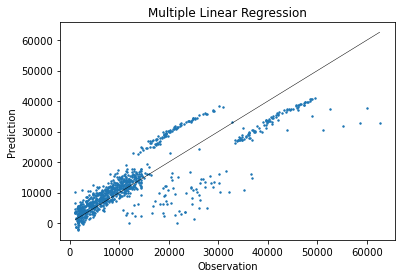

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_train,y_train_pred, s=2)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k', lw=0.5)
plt.title('Multiple Linear Regression')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.show()